# Getting started

In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mp1_utils import *
from keras.models import Sequential
from keras.layers import *
from keras.optimizers import SGD, Adam
from keras.utils import np_utils
%matplotlib inline

We generate three sample shapes :

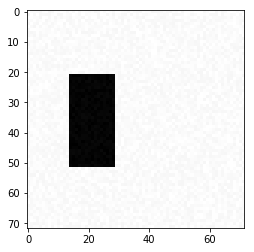

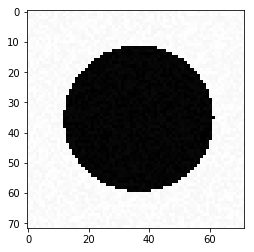

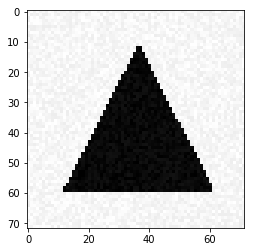

In [5]:
im = generate_a_rectangle(10, True)
plt.imshow(im.reshape(72,72), cmap='gray')
plt.show()

im = generate_a_disk(10)
plt.imshow(im.reshape(72,72), cmap='gray')
plt.show()

[im, v] = generate_a_triangle(20, False)
plt.imshow(im.reshape(72,72), cmap='gray')
plt.show()

# Simple classification

In [6]:
[X_train, Y_train] = generate_dataset_classification(300, 20)

Creating data...


We write the two networks and train them with the two optimizers :

In [7]:
model_sgd = Sequential()
model_sgd.add(Dense(input_dim=5184, units=3, activation="softmax"))
sgd = SGD(lr=0.001, momentum=0.9, nesterov=True)
model_sgd.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])

Y_train_onehot = np_utils.to_categorical(Y_train)
model_sgd.fit(X_train, Y_train_onehot, epochs=20, batch_size=16)

Epoch 1/20
300/300 [==============================] - 0s 774us/step - loss: 1.2614 - acc: 0.4667
Epoch 2/20
300/300 [==============================] - 0s 307us/step - loss: 0.5519 - acc: 0.7567
Epoch 3/20
300/300 [==============================] - 0s 358us/step - loss: 0.4095 - acc: 0.8500
Epoch 4/20
300/300 [==============================] - 0s 449us/step - loss: 0.2801 - acc: 0.8967
Epoch 5/20
300/300 [==============================] - 0s 333us/step - loss: 0.2634 - acc: 0.9033
Epoch 6/20
300/300 [==============================] - 0s 350us/step - loss: 0.2113 - acc: 0.9300
Epoch 7/20
300/300 [==============================] - 0s 379us/step - loss: 0.1951 - acc: 0.9600
Epoch 8/20
300/300 [==============================] - 0s 349us/step - loss: 0.1838 - acc: 0.9367
Epoch 9/20
300/300 [==============================] - 0s 413us/step - loss: 0.1584 - acc: 0.9600
Epoch 10/20
300/300 [==============================] - 0s 475us/step - loss: 0.1308 - acc: 0.9867
Epoch 11/20
300/300 [========

In [8]:
model_adam = Sequential()
model_adam.add(Dense(input_dim=5184, units=3, activation="softmax"))
adam = Adam(lr=0.001)
model_adam.compile(loss="categorical_crossentropy", optimizer=adam, metrics=["accuracy"])

Y_train_onehot = np_utils.to_categorical(Y_train)
model_adam.fit(X_train, Y_train_onehot, epochs=20, batch_size=16)

Epoch 1/20
300/300 [==============================] - 0s 1ms/step - loss: 1.7822 - acc: 0.4833
Epoch 2/20
300/300 [==============================] - 0s 302us/step - loss: 0.9546 - acc: 0.7000
Epoch 3/20
300/300 [==============================] - 0s 309us/step - loss: 0.6485 - acc: 0.7267
Epoch 4/20
300/300 [==============================] - 0s 343us/step - loss: 0.3910 - acc: 0.7900
Epoch 5/20
300/300 [==============================] - 0s 394us/step - loss: 0.2375 - acc: 0.9667
Epoch 6/20
300/300 [==============================] - 0s 343us/step - loss: 0.2104 - acc: 0.9633
Epoch 7/20
300/300 [==============================] - 0s 482us/step - loss: 0.1940 - acc: 0.9633
Epoch 8/20
300/300 [==============================] - 0s 510us/step - loss: 0.1873 - acc: 0.9367
Epoch 9/20
300/300 [==============================] - 0s 560us/step - loss: 0.1498 - acc: 0.9733
Epoch 10/20
300/300 [==============================] - 0s 428us/step - loss: 0.1204 - acc: 1.0000
Epoch 11/20
300/300 [==========

We test the prediction on two sample shapes :

In [9]:
X_test = generate_a_disk()
X_test = X_test.reshape(1, X_test.shape[0])
print(model_adam.predict(X_test))

[[0. 1. 0.]]


In [10]:
X_test = generate_a_rectangle()
X_test = X_test.reshape(1, X_test.shape[0])
print(model_adam.predict(X_test))

[[1. 0. 0.]]


# Visualization of the solution

We display the reshaped weights of the network's layer :

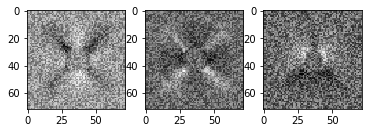

In [10]:
plt.subplot(1,3,1)
plt.imshow(model_sgd.get_weights()[0][:, 0].reshape((72,72)), cmap="gray")
plt.subplot(1,3,2)
plt.imshow(model_sgd.get_weights()[0][:, 1].reshape((72,72)), cmap="gray")
plt.subplot(1,3,3)
plt.imshow(model_sgd.get_weights()[0][:, 2].reshape((72,72)), cmap="gray")
plt.show()

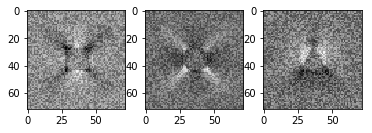

In [11]:
plt.subplot(1,3,1)
plt.imshow(model_adam.get_weights()[0][:, 0].reshape((72,72)), cmap="gray")
plt.subplot(1,3,2)
plt.imshow(model_adam.get_weights()[0][:, 1].reshape((72,72)), cmap="gray")
plt.subplot(1,3,3)
plt.imshow(model_adam.get_weights()[0][:, 2].reshape((72,72)), cmap="gray")
plt.show()

The result is fairly coherent. We notice that for each class, the weights are high (i.e. white) where the pixels should be white (whereas they would have been black with the other shapes) : typically, this happens with the four corners for the disk weights (in the middle).

# A More Difficult Classification Problem

In [11]:
[X_train, Y_train] = generate_dataset_classification(600, 20, True)

Creating data...


We use a CNN with one convolutional layer, a max pooling layer and a dense layer. We use Adam optimizer with learning rate 0.001 and the categorical cross-entropy for the loss. We train the network over 30 epochs with batch size 32.

In [12]:
cnn = Sequential()
cnn.add(Reshape(input_shape=(5184,), target_shape=((72,72,1))))
cnn.add(Conv2D(filters=16, kernel_size=(5,5), activation="relu"))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Flatten())
cnn.add(Dense(units=3, activation="softmax"))
optim = Adam(lr=0.001)
cnn.compile(optimizer=optim, loss="categorical_crossentropy", metrics=["accuracy"])

In [13]:
Y_train_onehot = np_utils.to_categorical(Y_train)
cnn.fit(X_train, Y_train_onehot, epochs=30, batch_size=32)

Epoch 1/30
600/600 [==============================] - 2s 3ms/step - loss: 1.0696 - acc: 0.5017
Epoch 2/30
600/600 [==============================] - 1s 2ms/step - loss: 0.8192 - acc: 0.6533
Epoch 3/30
600/600 [==============================] - 2s 3ms/step - loss: 0.6832 - acc: 0.7467
Epoch 4/30
600/600 [==============================] - 2s 3ms/step - loss: 0.5873 - acc: 0.7833
Epoch 5/30
600/600 [==============================] - 2s 3ms/step - loss: 0.5233 - acc: 0.8133
Epoch 6/30
600/600 [==============================] - 2s 3ms/step - loss: 0.4901 - acc: 0.8067
Epoch 7/30
600/600 [==============================] - 2s 3ms/step - loss: 0.4444 - acc: 0.8483
Epoch 8/30
600/600 [==============================] - 2s 3ms/step - loss: 0.3950 - acc: 0.8750
Epoch 9/30
600/600 [==============================] - 2s 3ms/step - loss: 0.3590 - acc: 0.9100
Epoch 10/30
600/600 [==============================] - 2s 3ms/step - loss: 0.3458 - acc: 0.8833
Epoch 11/30
600/600 [============================

In [14]:
[X_test, Y_test] = generate_test_set_classification()

Creating data...


In [15]:
cnn.evaluate(X_test, Y_test)

300/300 [==============================] - 1s 2ms/step


[0.630886656443278, 0.7333333325386048]

We get a 73.3% accuracy on the test set, which is coherently lower than the 99.5% training accuracy.

# A Regression problem

We generate the training and validation set for this problem :

In [31]:
[X_train, Y_train] = generate_dataset_regression(300, 20)

Creating data...


In [32]:
[X_test, Y_test] = generate_test_set_regression()

Creating data...


We want to retrieve the vertices of the triangle :

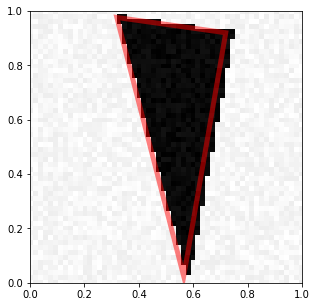

In [33]:
visualize_prediction(X_train[0], Y_train[0])

The problem is ill-posed, since the vertices can be ordered differently for a single triangle. Thus we normalize the training and testing vertices **by ordering the points according to their first coordinate** (which is sufficient since we consider continuous random coordinates).

In [34]:
def order_vertices(Y):
    Y2 = Y.reshape((-1,3,2))
    arg = np.argsort(Y2[:,:,0])
    Y3 = np.zeros_like(Y2)
    for i in range(300):
        Y3[i, :, :] = Y2[i, arg[i], :]
    Y4 = Y3.reshape((-1,6))
    return Y4

While designing a network that yields a perfect fit on the training data is relatively simple, it turns our that achieving a good performance on the testing set is much harder : we tried a wide amount of variations on the number of layers and layer parameters without exceeding a certain threshold on the validation error. We report here the network that worked out the best on a random testing set : it is composed of two convolutional layers with dropout and a maxpool layer inbetween. We use the SGD optimizer with learning rate 0.01 and momentum 0.5. The network was trained for 1000 epochs (by applying several times the command of the next block).

In [109]:
regressor = Sequential()
regressor.add(Reshape(input_shape=(5184,), target_shape=((72,72,1))))
regressor.add(Conv2D(filters=20, kernel_size=(5,5), activation="relu"))
regressor.add(Dropout(0.2))
regressor.add(MaxPooling2D(pool_size=(4,4), strides=(2,2)))
regressor.add(Conv2D(filters=20, kernel_size=(5,5), activation="relu"))
regressor.add(Dropout(0.2))
regressor.add(Flatten())
regressor.add(Dense(units=6, activation=None))
optim = SGD(lr=0.01, momentum=0.5, nesterov=True)
regressor.compile(optimizer=optim, loss="mse")

In [120]:
Y_train_order = order_vertices(Y_train)
regressor.fit(X_train, Y_train_order, validation_data=(X_test, order_vertices(Y_test)), epochs=100, batch_size=16, verbose=1)

Train on 300 samples, validate on 300 samples
Epoch 1/100
300/300 [==============================] - 5s 16ms/step - loss: 0.0029 - val_loss: 0.0285
Epoch 2/100
300/300 [==============================] - 4s 15ms/step - loss: 0.0031 - val_loss: 0.0272
Epoch 3/100
300/300 [==============================] - 5s 15ms/step - loss: 0.0026 - val_loss: 0.0272
Epoch 4/100
300/300 [==============================] - 5s 15ms/step - loss: 0.0028 - val_loss: 0.0269
Epoch 5/100
300/300 [==============================] - 4s 15ms/step - loss: 0.0029 - val_loss: 0.0271
Epoch 6/100
300/300 [==============================] - 4s 15ms/step - loss: 0.0028 - val_loss: 0.0269
Epoch 7/100
300/300 [==============================] - 5s 15ms/step - loss: 0.0028 - val_loss: 0.0276
Epoch 8/100
300/300 [==============================] - 4s 15ms/step - loss: 0.0027 - val_loss: 0.0273
Epoch 9/100
300/300 [==============================] - 5s 16ms/step - loss: 0.0030 - val_loss: 0.0272
Epoch 10/100
300/300 [==============

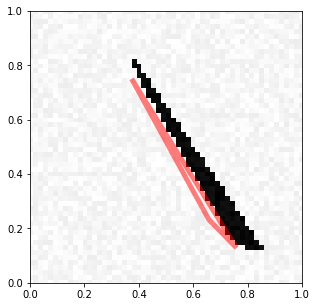

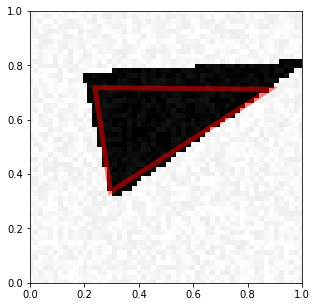

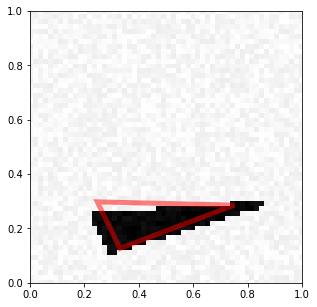

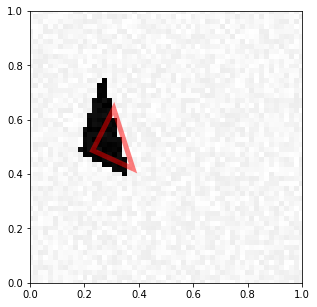

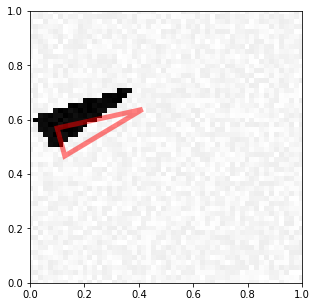

In [121]:
pred_train = regressor.predict(X_train)
for i in range(5):
    visualize_prediction(X_train[i], pred_train[i])

**Result on a testing set :**

In [123]:
[X_test, Y_test] = generate_test_set_regression()

Creating data...


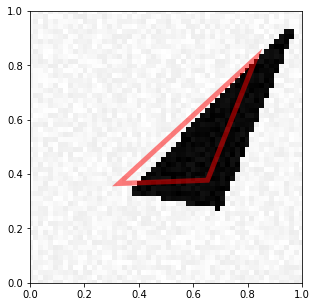

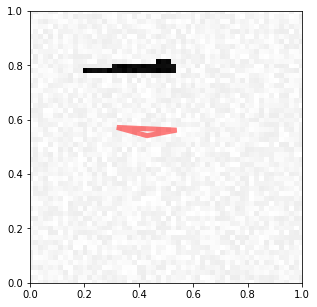

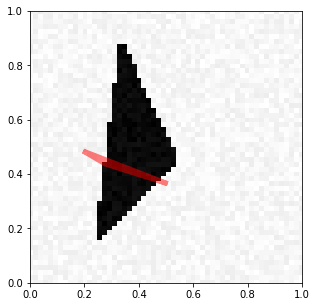

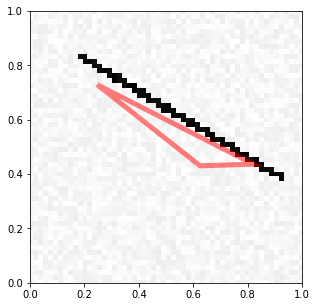

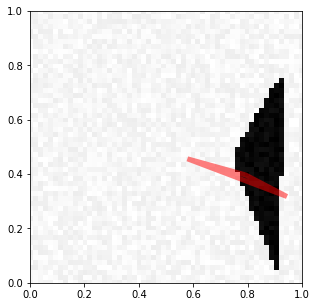

In [124]:
pred = regressor.predict(X_test)
for i in range(5):
    visualize_prediction(X_test[i], pred[i])

Even though the performance is not great, we can still notice that **the vertice reordering improved the performance** : on the test set, we can check that the performance is worse without reordering.

In [127]:
regressor.evaluate(X_test, order_vertices(Y_test))

300/300 [==============================] - 1s 3ms/step


0.027065000459551812

In [128]:
regressor.evaluate(X_test, (Y_test))

300/300 [==============================] - 1s 3ms/step


0.09060037980477015

## Hourglass network for denoising

We first write a function to generate a dataset containing the noisy images and the original images :

In [129]:
def generate_dataset_denoising(nb_samples, noise=0.0):
    im_size = generate_a_rectangle().shape[0]
    X = np.zeros([nb_samples, im_size])
    Y = np.zeros(nb_samples)
    print('Creating data...')
    for i in range(nb_samples):
        category = np.random.randint(3)
        if category == 0:
            X[i] = generate_a_rectangle(0, free_location=True)
        elif category == 1: 
            X[i] = generate_a_disk(0, free_location=True)
        else:
            [X[i], V] = generate_a_triangle(0, free_location=True)
    X_noise = X + noise * np.random.rand(nb_samples, im_size)
    X_noise = (X_noise + noise) / (255 + 2 * noise)
    return [X, X_noise]

Then we create the training and testing sets :

In [130]:
X, X_noise = generate_dataset_denoising(300, 20)
Xt, Xt_noise = generate_dataset_denoising(300, 20)

Creating data...
Creating data...


We design the hourglass network. After many trials, we selected the architecture which yielded both the smallest loss and the most visually satisfactory results. The structure of the network is the following : a convolutional layer a max pooling layer, and two transposed convolutional layers, which act similarly as the succession of an upsampling and a convolution. We use Adam optimizer with learning rate 0.01 since it yielded a slightly faster convergence than SGD.

The key points in the structure are the small size of the kernels, to limit the propagation of the noiseless image, the small strides to improve mixture between close pixels, and the max pooling layer to smooth the overall image.

In [172]:
hourglass = Sequential()
hourglass.add(Reshape(input_shape=(5184,), target_shape=((72,72,1))))
hourglass.add(Conv2D(16, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
hourglass.add(MaxPooling2D(pool_size=5, strides=2, padding='same'))
hourglass.add(Conv2DTranspose(4, kernel_size = (2,2), strides=(2,2), padding='valid'))
hourglass.add(Conv2DTranspose(1, kernel_size = (1,1), strides=(1,1), padding='valid'))
hourglass.add(Flatten())
optim = Adam(lr=0.01)
hourglass.compile(optimizer=optim, loss="mean_squared_error")

We train the network over 10 epochs, which is sufficient to obtain satisfactory results.

In [173]:
hourglass.fit(X_noise, X, validation_data=(Xt_noise, Xt), epochs=10, batch_size=16, verbose=1)

Train on 300 samples, validate on 300 samples
Epoch 1/10
300/300 [==============================] - 5s 17ms/step - loss: 57876.1969 - val_loss: 54704.3026
Epoch 2/10
300/300 [==============================] - 2s 6ms/step - loss: 46629.5672 - val_loss: 32596.3458
Epoch 3/10
300/300 [==============================] - 2s 6ms/step - loss: 16377.3554 - val_loss: 2476.4984
Epoch 4/10
300/300 [==============================] - 2s 6ms/step - loss: 2814.5872 - val_loss: 2292.2606
Epoch 5/10
300/300 [==============================] - 2s 5ms/step - loss: 2102.8803 - val_loss: 2103.8424
Epoch 6/10
300/300 [==============================] - 2s 5ms/step - loss: 2033.7892 - val_loss: 2024.5005
Epoch 7/10
300/300 [==============================] - 2s 5ms/step - loss: 2008.7333 - val_loss: 2007.2613
Epoch 8/10
300/300 [==============================] - 2s 5ms/step - loss: 2001.3423 - val_loss: 2000.2630
Epoch 9/10
300/300 [==============================] - 2s 6ms/step - loss: 1995.4335 - val_loss: 1994

Interestingly, we notive that the validation error is almost equal to the training error, which means that the network does no overfitting. We check the result on random samples of the testing set :

In [182]:
pred = hourglass.predict(Xt_noise)

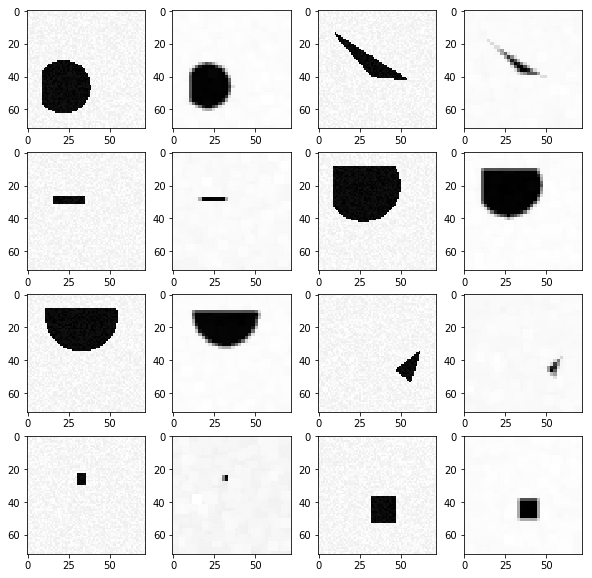

In [183]:
plt.figure(figsize=(10,10))
for i in range(8):
    idx = np.random.randint(300)
    plt.subplot(4,4,2*i+1)
    plt.imshow(Xt_noise[idx].reshape((72,72)), cmap="gray")
    plt.subplot(4,4,2*i+2)
    plt.imshow(pred[idx].reshape((72,72)), cmap="gray")
plt.show()

The denoising seems to be working decently, although the edges of the shapes are blurred toward their interior. However, this was to be expected since our denoising method is primarily based on convolutions. In this setting, there is indeed coherently a tradeoff between the precision of the reconstruction and the noise smoothing (this tradeoff is mainly determined through the size of the kernels and strides lengths).